In [84]:
import pandas as pd
import sqlite3

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
connect_sql = sqlite3.connect('/content/drive/MyDrive/ex07_42/checking-logs.sqlite')

In [102]:
df = pd.read_sql('select t.timestamp from checker t where t.uid like "user%"', connect_sql, parse_dates=['datetime'])
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [103]:
# df['datetime'] = df['datatime_new'].astype('datetime64[ns]')
df['year'] = df['timestamp'].astype('datetime64[ns]').dt.year
df['month'] = df['timestamp'].astype('datetime64[ns]').dt.month
df['day'] = df['timestamp'].astype('datetime64[ns]').dt.day
df['hour'] = df['timestamp'].astype('datetime64[ns]').dt.hour
df['minute'] = df['timestamp'].astype('datetime64[ns]').dt.minute
df['second'] = df['timestamp'].astype('datetime64[ns]').dt.second
df

,timestamp,year,month,day,hour,minute,second
0,2020-04-17 05:19:02.744528,2020,4,17,5,19,2
1,2020-04-17 05:22:35.249331,2020,4,17,5,22,35
2,2020-04-17 05:22:45.549397,2020,4,17,5,22,45
3,2020-04-17 05:34:14.691200,2020,4,17,5,34,14
4,2020-04-17 05:34:24.422370,2020,4,17,5,34,24
...,...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020,5,21,20,19,6
3203,2020-05-21 20:22:41.785725,2020,5,21,20,22,41
3204,2020-05-21 20:22:41.877806,2020,5,21,20,22,41
3205,2020-05-21 20:37:00.129678,2020,5,21,20,37,0


In [104]:
ranges = [-1, 4, 7, 11, 17, 20, 24]
labels = ['night', 'early morning', 'morning', 'afternoon', 'early evening', 'evening']

df['daytime_new'] = pd.cut(df['hour'], bins=[-1, 4, 7, 11, 17, 20, 24], labels=labels)

In [106]:
df

,timestamp,year,month,day,hour,minute,second,daytime_new
0,2020-04-17 05:19:02.744528,2020,4,17,5,19,2,early morning
1,2020-04-17 05:22:35.249331,2020,4,17,5,22,35,early morning
2,2020-04-17 05:22:45.549397,2020,4,17,5,22,45,early morning
3,2020-04-17 05:34:14.691200,2020,4,17,5,34,14,early morning
4,2020-04-17 05:34:24.422370,2020,4,17,5,34,24,early morning
...,...,...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020,5,21,20,19,6,early evening
3203,2020-05-21 20:22:41.785725,2020,5,21,20,22,41,early evening
3204,2020-05-21 20:22:41.877806,2020,5,21,20,22,41,early evening
3205,2020-05-21 20:37:00.129678,2020,5,21,20,37,0,early evening


In [107]:
df['timestamp'] = list(map(lambda x: x.split(' ')[0], df['timestamp']))
df

,timestamp,year,month,day,hour,minute,second,daytime_new
0,2020-04-17,2020,4,17,5,19,2,early morning
1,2020-04-17,2020,4,17,5,22,35,early morning
2,2020-04-17,2020,4,17,5,22,45,early morning
3,2020-04-17,2020,4,17,5,34,14,early morning
4,2020-04-17,2020,4,17,5,34,24,early morning
...,...,...,...,...,...,...,...,...
3202,2020-05-21,2020,5,21,20,19,6,early evening
3203,2020-05-21,2020,5,21,20,22,41,early evening
3204,2020-05-21,2020,5,21,20,22,41,early evening
3205,2020-05-21,2020,5,21,20,37,0,early evening


In [108]:
df = df.groupby('daytime_new').timestamp.value_counts().unstack(0)
df

daytime_new,night,early morning,morning,afternoon,early evening,evening
timestamp,,,,,,
2020-04-17,NaN,13.0,8.0,2.0,NaN,NaN
2020-04-18,NaN,1.0,NaN,40.0,18.0,10.0
2020-04-19,2.0,2.0,14.0,4.0,3.0,8.0
2020-04-20,NaN,NaN,2.0,13.0,10.0,NaN
2020-04-21,NaN,NaN,NaN,9.0,14.0,2.0
2020-04-22,NaN,NaN,NaN,4.0,15.0,9.0
2020-04-23,2.0,2.0,6.0,13.0,2.0,18.0
2020-04-24,NaN,NaN,2.0,12.0,NaN,2.0
2020-04-25,1.0,10.0,19.0,40.0,22.0,12.0


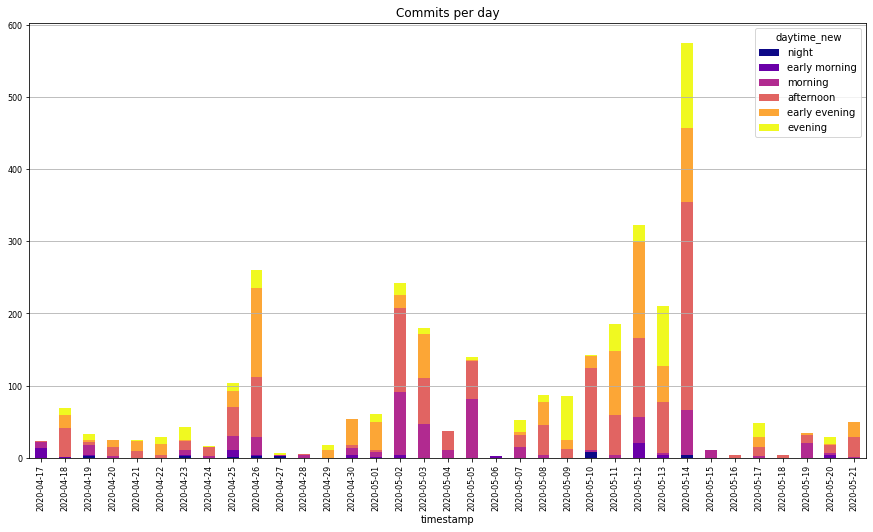

In [109]:
ax = df.plot.bar(stacked=True, figsize=(15, 8), title='Commits per day',
                 rot=90, fontsize=8, colormap='plasma')
ax.grid(axis='y')

Когда наши пользователи обычно проводят лабы: ночью, утром, днем или
вечером?», early_evening, evening

Which day has:
∗ the most number of commits
∗ and at the same time, the number of commits in the evening is higher
than in the afternoon? 2020-05-14